In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/googel-stocks/google_stock_data.csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/googel-stocks/google_stock_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2010-01-04  15.689439  15.753504  15.621622  15.684434  15.684434   
1  2010-01-05  15.695195  15.711712  15.554054  15.615365  15.615365   
2  2010-01-06  15.662162  15.662162  15.174174  15.221722  15.221722   
3  2010-01-07  15.250250  15.265265  14.831081  14.867367  14.867367   
4  2010-01-08  14.814815  15.096346  14.742492  15.065566  15.065566   

      Volume  
0   78169752  
1  120067812  
2  158988852  
3  256315428  
4  188783028  


In [ ]:
# Generate future dates from 2024-01-01 to 2030-12-31
future_dates = pd.date_range(start='2024-01-01', end='2030-12-31', freq='B')  # 'B' frequency generates business days only

# Create a DataFrame for these dates
future_df = pd.DataFrame(future_dates, columns=['Date'])

# Convert the 'Date' column to datetime format in the original data
data['Date'] = pd.to_datetime(data['Date'])

# Merge the original data with the future dates DataFrame
full_data = pd.concat([data, future_df], ignore_index=True)

# Sort the DataFrame by Date
full_data = full_data.sort_values(by='Date').reset_index(drop=True)

# Display the first few rows of the merged dataset
print(full_data.tail(20))  # Show the last 20 rows to confirm that future dates were added

           Date  Open  High  Low  Close  Adj Close  Volume
5370 2030-12-04   NaN   NaN  NaN    NaN        NaN     NaN
5371 2030-12-05   NaN   NaN  NaN    NaN        NaN     NaN
5372 2030-12-06   NaN   NaN  NaN    NaN        NaN     NaN
5373 2030-12-09   NaN   NaN  NaN    NaN        NaN     NaN
5374 2030-12-10   NaN   NaN  NaN    NaN        NaN     NaN
5375 2030-12-11   NaN   NaN  NaN    NaN        NaN     NaN
5376 2030-12-12   NaN   NaN  NaN    NaN        NaN     NaN
5377 2030-12-13   NaN   NaN  NaN    NaN        NaN     NaN
5378 2030-12-16   NaN   NaN  NaN    NaN        NaN     NaN
5379 2030-12-17   NaN   NaN  NaN    NaN        NaN     NaN
5380 2030-12-18   NaN   NaN  NaN    NaN        NaN     NaN
5381 2030-12-19   NaN   NaN  NaN    NaN        NaN     NaN
5382 2030-12-20   NaN   NaN  NaN    NaN        NaN     NaN
5383 2030-12-23   NaN   NaN  NaN    NaN        NaN     NaN
5384 2030-12-24   NaN   NaN  NaN    NaN        NaN     NaN
5385 2030-12-25   NaN   NaN  NaN    NaN        NaN     N

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/p

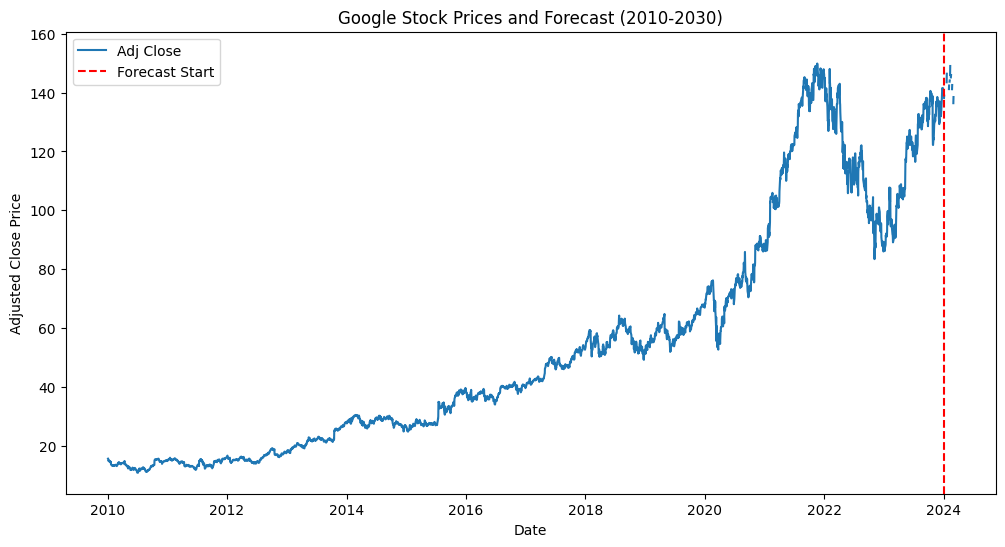

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Use the historical data up to 2023 to fit the ARIMA model
historical_data = full_data[full_data['Date'] <= '2023-12-31'].set_index('Date')

# Ensure 'Adj Close' column is available and drop NaNs for fitting the model
historical_data = historical_data['Adj Close'].dropna()

# Fit the ARIMA model (you can adjust the order depending on the data characteristics)
model = ARIMA(historical_data, order=(5, 1, 0))
model_fit = model.fit()

# Predict future values from 2024 to 2030
future_forecast = model_fit.forecast(steps=len(future_dates))

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(future_forecast, index=future_dates, columns=['Adj Close'])

# Combine the forecast with the existing data
full_data.set_index('Date', inplace=True)
full_data.update(forecast_df)

# Reset the index to make 'Date' a column again
full_data.reset_index(inplace=True)

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(full_data['Date'], full_data['Adj Close'], label='Adj Close')
plt.axvline(x=pd.Timestamp('2024-01-01'), color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('Google Stock Prices and Forecast (2010-2030)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [ ]:
# Generate future dates from 2024-01-01 to 2030-12-31
future_dates = pd.date_range(start='2024-01-01', end='2030-12-31', freq='B')  # 'B' frequency generates business days only

# Create a DataFrame for these future dates
future_df = pd.DataFrame(index=future_dates)

# Merge the future dates with the existing data
full_data = pd.concat([data, future_df], axis=0)

# Display the last few rows to verify the future dates are added
print(full_data.tail(20))

                    Date  Open  High  Low  Close  Adj Close  Volume
2030-12-04 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-05 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-06 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-09 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-10 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-11 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-12 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-13 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-16 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-17 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-18 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-19 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-20 00:00:00  NaT   NaN   NaN  NaN    NaN        NaN     NaN
2030-12-23 00:00:00  NaT   NaN   NaN  NaN    NaN

In [ ]:
# Find the latest date in the data
latest_date = data.index.max()
print(f"Latest date in the dataset: {latest_date}")

Latest date in the dataset: 3562


In [ ]:
# Check the latest date in the dataset
latest_date = data.index.max()
print(f"Latest date in the dataset: {latest_date}")

Latest date in the dataset: 3562


In [ ]:
# Ensure 'Date' is the index and is sorted
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

# Verify the index is correctly set
print(data.index)

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2024-02-15', '2024-02-16', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23', '2024-02-26', '2024-02-27',
               '2024-02-28', '2024-02-29'],
              dtype='datetime64[ns]', name='Date', length=3563, freq=None)


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/p

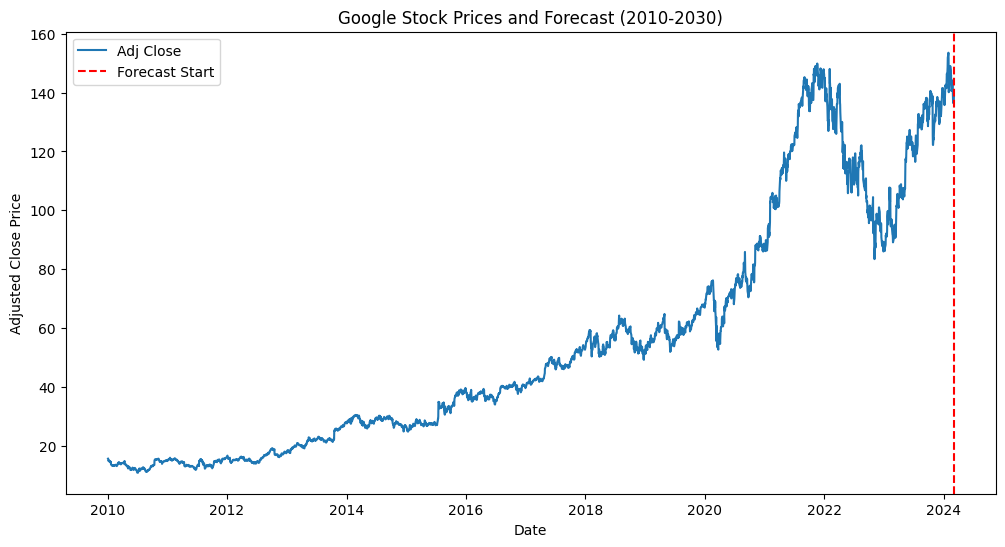

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Use historical data up to the last available date (2024-02-29) for model fitting
historical_data = data['Adj Close'].dropna()

# Fit the ARIMA model
model = ARIMA(historical_data, order=(5, 1, 0))  # Adjust the order as needed
model_fit = model.fit()

# Generate future dates from 2024-03-01 to 2030-12-31
future_dates = pd.date_range(start='2024-03-01', end='2030-12-31', freq='B')  # 'B' is for business days

# Predict future values for these dates
future_forecast = model_fit.forecast(steps=len(future_dates))

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(future_forecast, index=future_dates, columns=['Adj Close'])

# Combine the historical data with the forecast
combined_data = pd.concat([historical_data, forecast_df], axis=0)

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['Adj Close'], label='Adj Close')
plt.axvline(x=future_dates[0], color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('Google Stock Prices and Forecast (2010-2030)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [ ]:
combined_data.to_csv('google_stock_forecast_2010_2030.csv')

In [ ]:
# Maximum Adjusted Close in the historical data
max_adj_close_historical = historical_data.max()

# Minimum Adjusted Close in the historical data
min_adj_close_historical = historical_data.min()

# Average Adjusted Close in the historical data
avg_adj_close_historical = historical_data.mean()

# Maximum Adjusted Close in the forecasted data
max_adj_close_forecast = forecast_df['Adj Close'].max()

# Minimum Adjusted Close in the forecasted data
min_adj_close_forecast = forecast_df['Adj Close'].min()

# Average Adjusted Close in the forecasted data
avg_adj_close_forecast = forecast_df['Adj Close'].mean()

# Total Volume in the historical data
total_volume_historical = data['Volume'].sum()

# Display the calculated KPIs
print(f"Historical Data (2010-2024):")
print(f"Max Adjusted Close: {max_adj_close_historical:.2f}")
print(f"Min Adjusted Close: {min_adj_close_historical:.2f}")
print(f"Average Adjusted Close: {avg_adj_close_historical:.2f}")
print(f"Total Volume: {total_volume_historical:,}")

print("\nForecasted Data (2024-2030):")
print(f"Max Adjusted Close: {max_adj_close_forecast:.2f}")
print(f"Min Adjusted Close: {min_adj_close_forecast:.2f}")
print(f"Average Adjusted Close: {avg_adj_close_forecast:.2f}")

Historical Data (2010-2024):
Max Adjusted Close: 153.51
Min Adjusted Close: 10.91
Average Adjusted Close: 55.13
Total Volume: 206,304,299,596

Forecasted Data (2024-2030):
Max Adjusted Close: nan
Min Adjusted Close: nan
Average Adjusted Close: nan


In [ ]:
# Calculate growth rate from historical average to forecasted average
growth_rate = ((avg_adj_close_forecast - avg_adj_close_historical) / avg_adj_close_historical) * 100
print(f"\nGrowth Rate from Historical to Forecasted Average: {growth_rate:.2f}%")


Growth Rate from Historical to Forecasted Average: nan%


In [ ]:
# Check for NaN values in the historical and forecasted averages
print(f"Average Adjusted Close (Historical): {avg_adj_close_historical}")
print(f"Average Adjusted Close (Forecasted): {avg_adj_close_forecast}")

# If either value is NaN, it will help us understand why the growth rate is NaN

Average Adjusted Close (Historical): 55.13065079253542
Average Adjusted Close (Forecasted): nan


In [ ]:
# Ensure no NaNs in the forecast data
forecast_df = forecast_df.dropna()

# Recalculate the averages
avg_adj_close_historical = historical_data.mean()
avg_adj_close_forecast = forecast_df['Adj Close'].mean()

# Recalculate the growth rate
if avg_adj_close_historical != 0:  # Avoid division by zero
    growth_rate = ((avg_adj_close_forecast - avg_adj_close_historical) / avg_adj_close_historical) * 100
else:
    growth_rate = float('inf')  # Represent infinite growth if historical average was zero

print(f"\nGrowth Rate from Historical to Forecasted Average: {growth_rate:.2f}%")


Growth Rate from Historical to Forecasted Average: nan%
